In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


####
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df["EmployeeCount"].sum()

1470

In [6]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

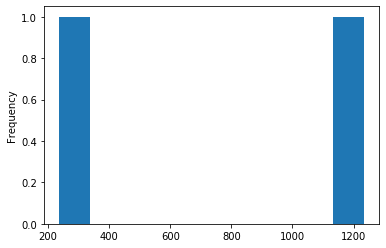

In [9]:
df["Attrition"].value_counts().plot(kind="hist")

No     1233
Yes     237
Name: Attrition, dtype: int64


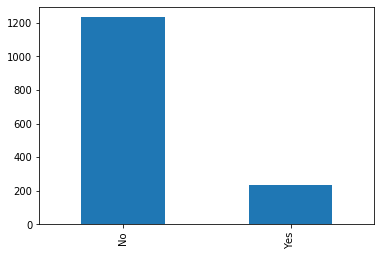

In [10]:
df["Attrition"].value_counts().plot(kind="bar")
print(df["Attrition"].value_counts())

In [11]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
# poglej različnost podatkov

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
# pol imaš describe da pogledaš vse kaj se dogaja

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df1 = df.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'])

In [15]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


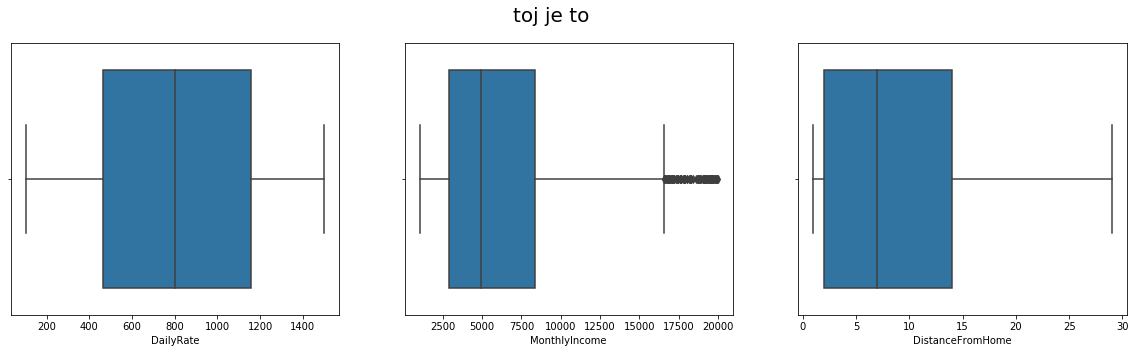

In [16]:
fig,ax = plt.subplots(1,3, figsize=(20,5))
plt.suptitle("toj je to",fontsize = 20)

sns.boxplot(df["DailyRate"],ax=ax[0])
sns.boxplot(df["MonthlyIncome"],ax=ax[1])
sns.boxplot(df["DistanceFromHome"],ax=ax[2])



plt.show()

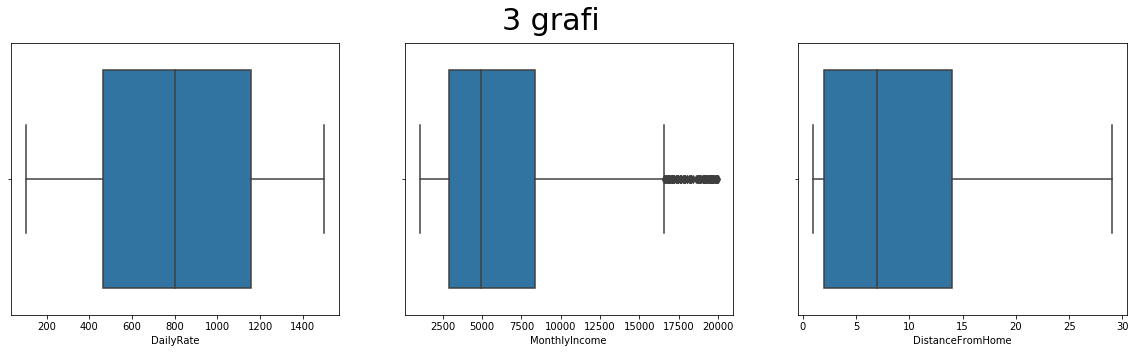

In [17]:
# naredi še enkrat boxplot

fig,ax = plt.subplots(1,3, figsize=(20,5))
plt.suptitle("3 grafi",fontsize=30)
sns.boxplot(df1["DailyRate"],ax=ax[0])
sns.boxplot(df1["MonthlyIncome"],ax=ax[1])
sns.boxplot(df1["DistanceFromHome"],ax=ax[2])

plt.show()






In [18]:
corr = df1.corr()

In [19]:
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


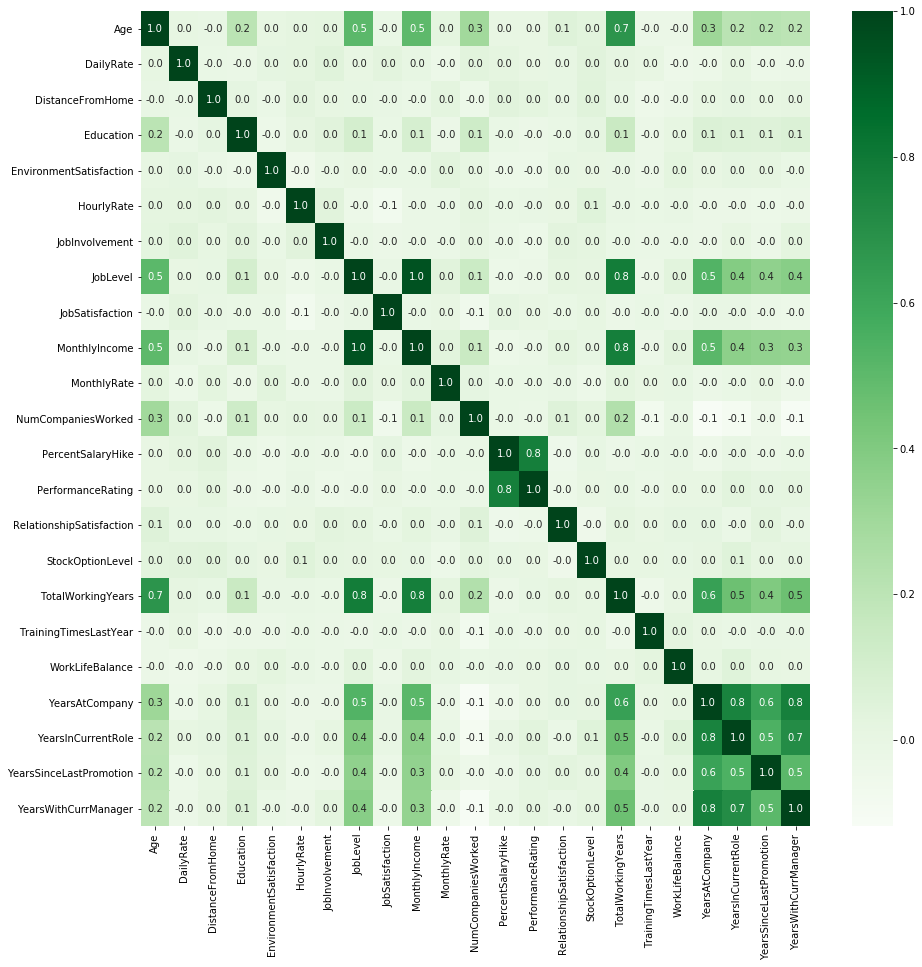

In [20]:
# plotaj še to

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,square=False, fmt=".1f",cmap="Greens")

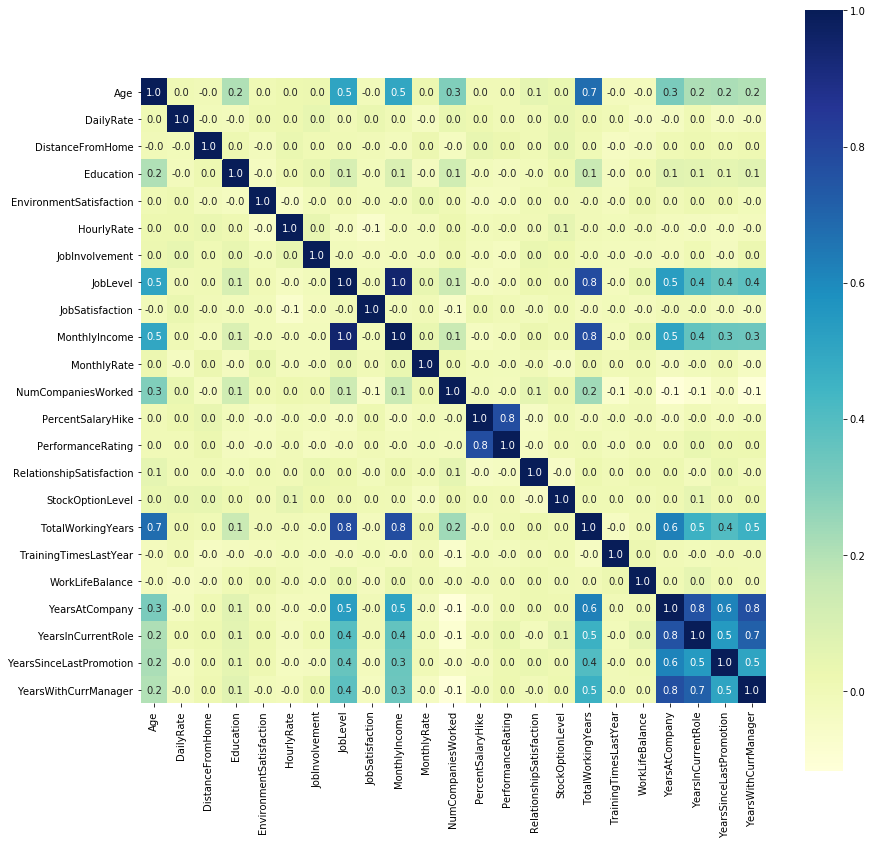

In [21]:
# še enkrat plotaj kar si splotal


plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,square=True,fmt=".1f", cmap="YlGnBu")


In [22]:
# iz tega naredi :
# corelacijodata[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate'

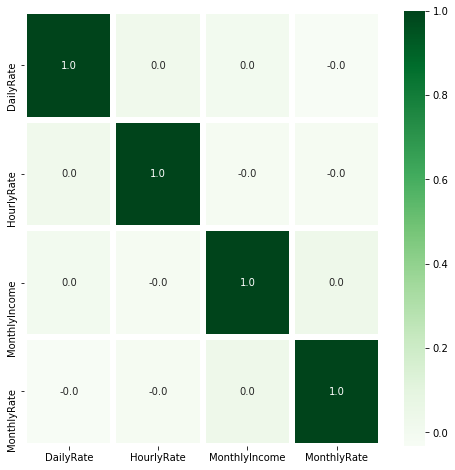

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']].corr(),annot=True, fmt=".1f",cmap="Greens",linewidths=5
           )

In [24]:
# probi najprej ugotovit keri so category 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [25]:
df1.shape

(1470, 31)

In [26]:
category = df1.select_dtypes(include=['category'].columns)

AttributeError: 'list' object has no attribute 'columns'

In [27]:
listtoplot = ["Attrition","BusinessTravel","Department","EducationField","Gender","OverTime"]

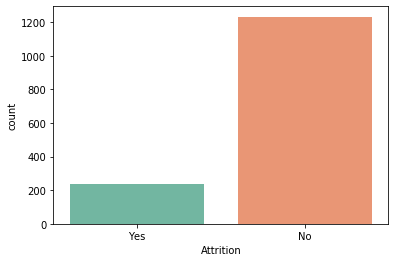

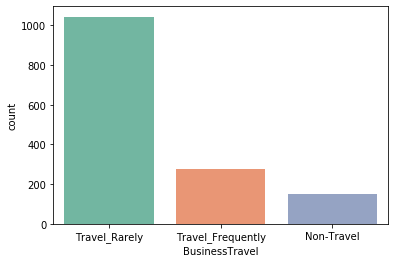

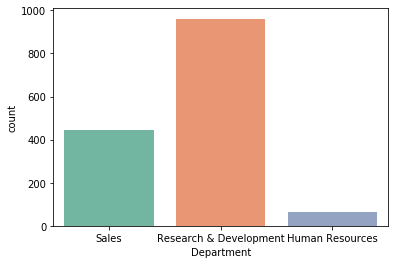

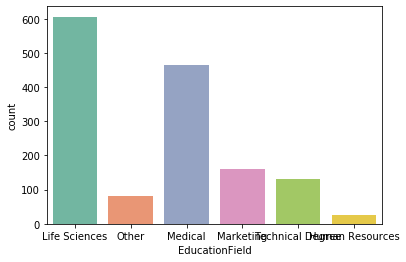

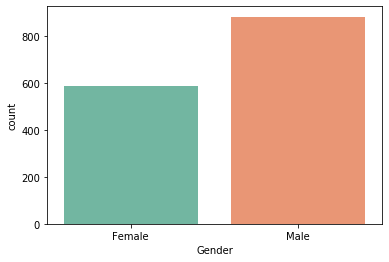

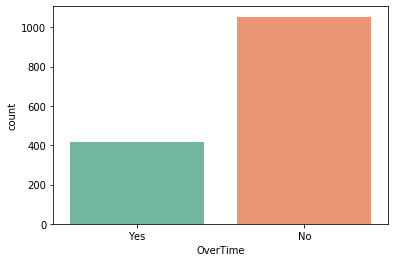

In [28]:
#fig, ax = plt.subplots(3,3)

for f in listtoplot:
    sns.countplot(x = f, data=df1,palette="Set2")
    plt.show()

In [29]:
df1["JobRole"].unique()


array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [30]:
df["JobRole"].head()

0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object

In [31]:
df1["JobRole"].replace(['Human Resources','Laboratory Technician'],value="HR-LT",inplace=True)

In [32]:
df1["JobRole"].replace(['Research Scientist','Sales Executive'],value="RS-SE",inplace=True)

In [34]:
df1["JobRole"].replace(['Healthcare Representative','Manufacturing Director'], value="HE-MD",inplace=True)

In [41]:
# ENCODER 

df1["Attrition"].replace(["Yes","No"],[1,0],inplace=True)

In [44]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [57]:
final_data = pd.get_dummies(df1)
final_data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


In [59]:
# sedaj pa pejmo na strojno učenej 


In [66]:
 # najprej splitaj data  na training in testiing
    


X = final_data.drop(["Attrition"],axis=1)
y = final_data["Attrition"]

In [67]:
# ok, sedaj imam X in y , pojdi na funkcijo 

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1102, 48)
(368, 48)
(368,)
(1102,)


In [85]:
print(y_train.value_counts())
print(y_test.value_counts())

0    923
1    179
Name: Attrition, dtype: int64
0    310
1     58
Name: Attrition, dtype: int64


In [92]:
# uvozimo knjizico za logisticregression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
# predikcija je 

y_pred = logreg.predict(X_test)


In [98]:
# natisni mi kakšna je bila accuracy za ta data

from sklearn.metrics import auc,confusion_matrix


In [107]:
cm = confusion_matrix(y_test,y_pred,[1,0]).T

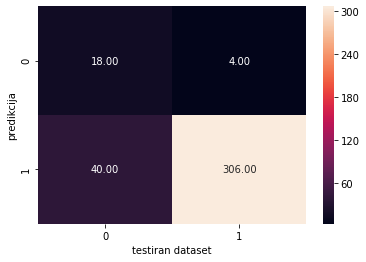

In [112]:
sns.heatmap(cm,annot=True,fmt=".2f")
plt.xlabel("testiran dataset")
plt.ylabel("predikcija")
plt.show()

In [115]:
#Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB


In [134]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
y_pred = model.predict(X_test)

In [140]:
# calculate te accuracy, precision,recallll

#
from sklearn import metrics
#

acc_nb = round(metrics.accuracy_score(y_test,y_pred) * 100,2)
print("the accuracy is: ", acc_nb)
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print("Recall:", round(metrics.recall_score(y_test,y_pred)*100,2))

the accuracy is:  78.26
Precision :  39.22
Recall: 68.97


In [144]:
# Decision Tree cLASSFIier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini",min_samples_split=100,min_samples_leaf=10,max_depth=50)

In [145]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [148]:
# po fitanju sledi predikcija

y_pred = clf.predict(X_train)

feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


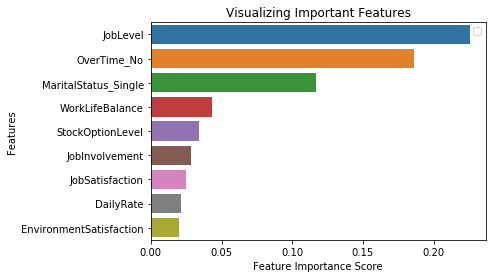

In [154]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [156]:
final_data.to_csv("finaldata.csv")

In [157]:
vnovic = pd.read_csv("finaldata.csv")

In [160]:
#### ok pojdimo nazaj na delo

data = pd.read_csv("finaldata.csv")

In [166]:
data = data.drop(columns="Unnamed: 0")

In [167]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_HR-LT,JobRole_Manager,JobRole_RS-SE,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,1,0,1,0
5,32,0,1005,2,2,4,79,3,1,4,...,1,0,0,0,0,0,0,1,1,0
6,59,0,1324,3,3,3,81,4,1,1,...,1,0,0,0,0,0,1,0,0,1
7,30,0,1358,24,1,4,67,3,1,3,...,1,0,0,0,0,1,0,0,1,0
8,38,0,216,23,3,4,44,2,3,3,...,0,0,0,0,0,0,0,1,1,0
9,36,0,1299,27,3,3,94,3,2,3,...,0,0,0,0,0,0,1,0,1,0


In [181]:
#spliting data
X = data.drop(["Attrition"],axis=1)
y = data["Attrition"]

##najprej narediš X,y
##pol daš train test split
## pol pa kličeš funkcijo * :) neki tazga

In [180]:
# train test split


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 0, stratify=y)

# Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
# y predikcija je 

y_pred = logreg.predict(X_test)

In [203]:
#Calculate the accuracy, precision

# uvoz knjizice

from sklearn import metrics

print("logisticna regresija")
print("")
accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("accuracy:",accuracy,"%")
precisiony = round(metrics.precision_score(y_test,y_pred)*100,2)
print("preciznost:", precisiony,"%")

recalled = round(metrics.recall_score(y_test,y_pred)*100,2)
print("recall:",recalled,"%")


logisticna regresija

accuracy: 87.77 %
preciznost: 79.17 %
recall: 32.2 %


In [231]:
# naredi confusion matrix to find the sensitivty and specificatiy

from sklearn.metrics import confusion_matrix,auc

def drawit(actual,predicted):
    cm = confusion_matrix(actual,predicted,[1,0]).T
    sns.heatmap(cm,annot=True, fmt=".2f",xticklabels=["yes","no"], yticklabels=["Yes","No"])
    plt.ylabel("predicted")
    plt.xlabel("actual")
    plt.show()




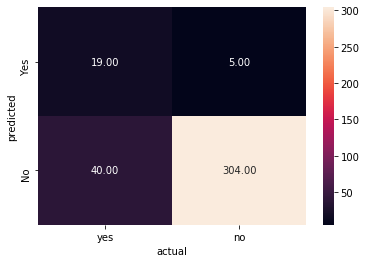

In [232]:
drawit(y_test,y_pred)

In [234]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreecLASSIFIEer
# from sklearn.tree import DecisionTreeClassifier



In [235]:
clf = DecisionTreeClassifier(criterion="gini",min_samples_split=100,min_samples_leaf=10,max_depth=50)

In [236]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [240]:
y_pred = clf.predict(X_test)

In [241]:
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


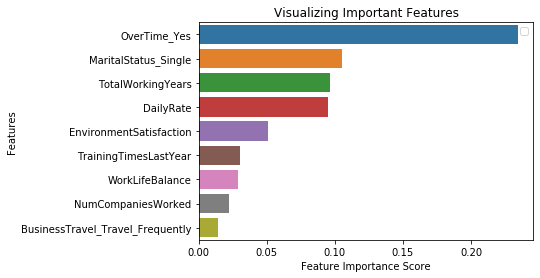

In [242]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


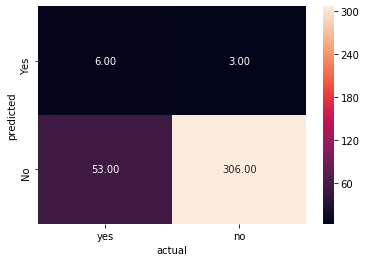

In [245]:
# confusion matrix 

drawit(y_test,y_pred)